In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

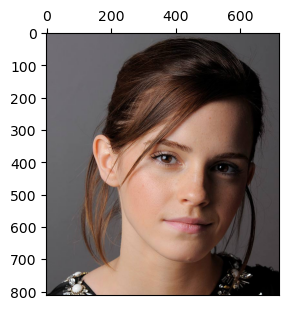

In [2]:
im = cv.imread("a1images/emma.jpg")

fig, ax = plt.subplots(1,1,figsize = (3,4))
ax.imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

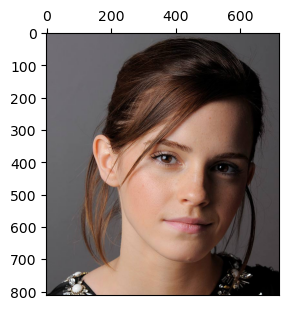

In [3]:
im = plt.imread("a1images/emma.jpg")
fig ,ax = plt.subplots(1,1, figsize = (3,4))

ax.imshow(im)
ax.xaxis.set_ticks_position('top')
plt.show()

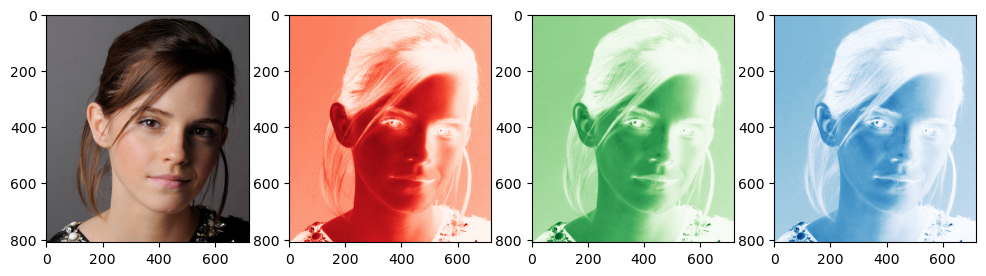

In [4]:
im = plt.imread("a1images/emma.jpg")
fig ,ax = plt.subplots(1,4, figsize = (12,16))

ax[0].imshow(im) 
ax[1].imshow(im[...,0],cmap='Reds')    #red plane only
ax[2].imshow(im[...,1],cmap='Greens')  #green plane only
ax[3].imshow(im[...,2],cmap='Blues')   #blue plane only

#ax.xaxis.set_ticks_position('top')
plt.show()

In [5]:
im.shape

(810, 720, 3)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19784\1100180772.py:7: RuntimeWarning: overflow encountered in scalar add
  val = sum(im[i][j])/3


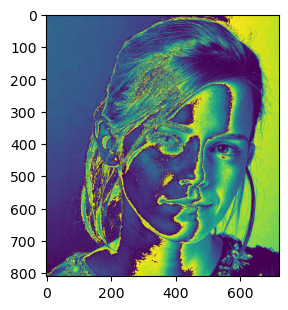

In [6]:
rows , cls , chas = im.shape   #(810, 720, 3)

gray_im = np.zeros((rows,cls))

for i in range(rows):
    for j in range(cls):
        val = sum(im[i][j])/3
        gray_im[i][j] = val

fig ,ax = plt.subplots(1,1, figsize = (3,4))

ax.imshow(gray_im)
plt.show()

## Question 1

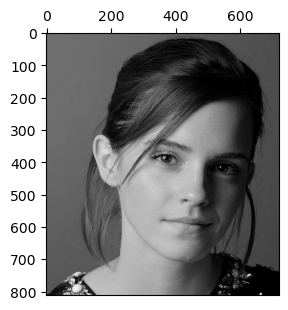

In [7]:
gray_im = np.dot(im,[0.2989, 0.5870, 0.1140])

fig ,ax = plt.subplots(1,1, figsize = (3,4))
ax.imshow(gray_im,cmap = 'gray')
ax.xaxis.set_ticks_position('top')
plt.show()

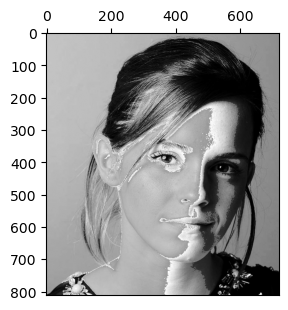

In [8]:
def f(x):
    return np.where(
        (x >= 50) & (x < 150),
        1.55 * x + 22.5,
        x
    ).astype(np.uint8)


    
new_im_1 = f(gray_im)

fig ,ax = plt.subplots(1,1, figsize = (3,4))

ax.imshow(new_im_1,cmap = 'gray')
ax.xaxis.set_ticks_position('top')
plt.show()

In [9]:
im = cv.imread('a1images/emma.jpg')
gray_im = cv.cvtColor(im,cv.COLOR_BGR2GRAY)

"""
cv.imshow(" " , gray_im)
cv.waitKey(0)
cv.destroyAllWindows()
"""

'\ncv.imshow(" " , gray_im)\ncv.waitKey(0)\ncv.destroyAllWindows()\n'

In [13]:
#with mask and lut

r = np.arange(256)
s = np.zeros(256)

#function
slope = (255-100)/(150-50)
c = 100 - slope * 50

mask = (r>=50) & (r<150)
s[mask] = slope * r[mask] + c


m1 = r<50
s[m1] = r[m1]

m2 = r>=150
s[m2] = r[m2]

lut = np.clip(np.round(s),0,255).astype(np.uint8)

transformed = cv.LUT(gray_im,lut)

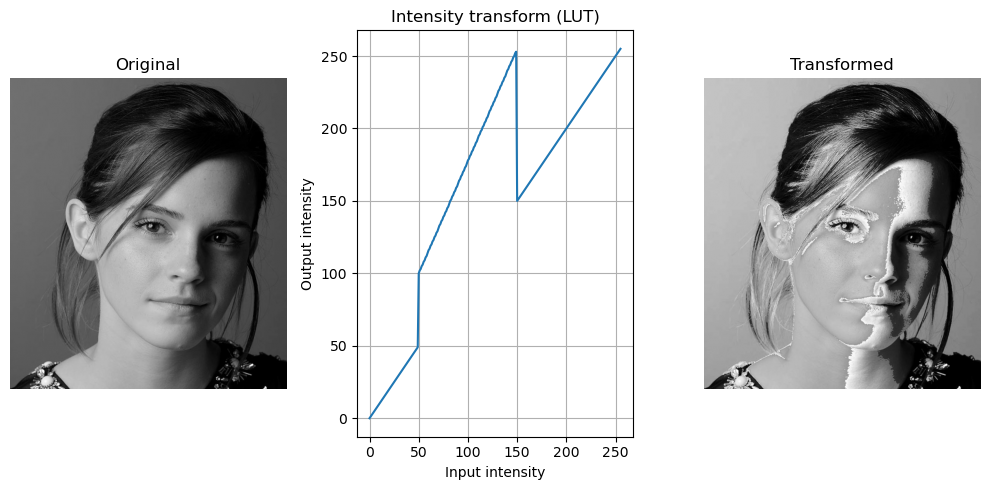

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(gray_im, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.plot(lut)
plt.title('Intensity transform (LUT)')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')
plt.grid(True)

plt.subplot(1,3,3)
plt.imshow(transformed, cmap='gray')
plt.title('Transformed')
plt.axis('off')

plt.tight_layout()
plt.show()



## Question 2

In [6]:
im = cv.imread("a1images/brain_proton_density_slice.png")
gray_im = cv.cvtColor(im,cv.COLOR_BGR2GRAY)


"""
cv.imshow(" " , gray_im)
cv.waitKey(0)
cv.destroyAllWindows()
"""

'\ncv.imshow(" " , gray_im)\ncv.waitKey(0)\ncv.destroyAllWindows()\n'

### part a : white matter

In [15]:
r = np.arange(256)
s = np.zeros_like(r)



m1 = r<120
s[m1] = 0.8 * r[m1]

m2 = (120<=r) & (r<256)
s[m2] = 1.5*r[m2] - 80


m3 = r>=230
s[m3] = 255 - 0.5 * (255 - r[m3]) 


lut = np.clip(np.round(s),0,255).astype(np.uint8)

transformed = cv.LUT(gray_im,lut)

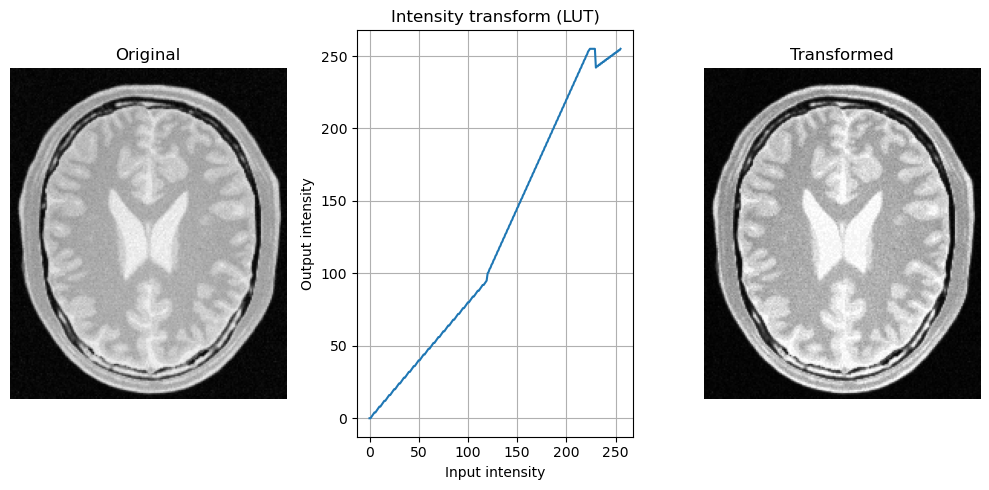

In [16]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(gray_im, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.plot(lut)
plt.title('Intensity transform (LUT)')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')
plt.grid(True)

plt.subplot(1,3,3)
plt.imshow(transformed, cmap='gray')
plt.title('Transformed')
plt.axis('off')

plt.tight_layout()
plt.show()



### part b : gray matter 

In [18]:
r = np.arange(256)
s = np.zeros_like(r)


m1 = r < 70
s[m1] = 0.6 * r[m1]

m2 = (r >= 70) & (r <= 130)
s[m2] = 80 + 2 * (r[m2] - 70)  

m3 = r > 130
s[m3] = 0.7 * r[m3]

lut = np.clip(np.round(s),0,255).astype(np.uint8)
transformed = cv.LUT(gray_im,lut)

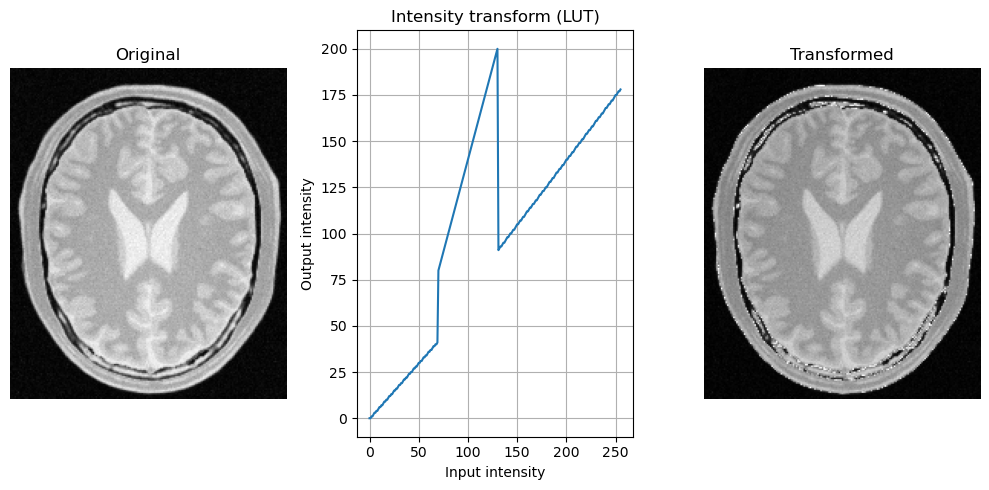

In [19]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(gray_im, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.plot(lut)
plt.title('Intensity transform (LUT)')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')
plt.grid(True)

plt.subplot(1,3,3)
plt.imshow(transformed, cmap='gray')
plt.title('Transformed')
plt.axis('off')

plt.tight_layout()
plt.show()



## Gamma Correction

---

### 1. What is Gamma?

- **Gamma** controls brightness in a *non-linear* way (not just brighter or darker).
- Human eyes see brightness **logarithmically** (we notice shadows and midtones more than extreme blacks or whites).
- **Digital screens** store and display images in a *gamma-encoded* way so they look correct to us.

---

### 2. Why We Need Gamma Correction

- Cameras capture light **linearly** (real-world brightness is proportional to light intensity).
- If we showed this linear data directly, the image would look **too dark**.
- **Gamma correction** brightens midtones without overexposing highlights or losing shadow detail.

---

### 3. Two Main Uses

1. **Encoding (Gamma Encoding)** — applied when saving an image, so it looks correct on screens.  
2. **Decoding (Gamma Decoding)** — applied when loading or processing an image, to restore real light values.

---

### 4. The Gamma Formula

- **Encoding:**  

$$
\text{encoded} = \text{real}^{\frac{1}{\gamma}}
$$

- **Decoding:**  

$$
\text{real} = \text{encoded}^{\gamma}
$$

- For most displays, **γ ≈ 2.2**.

---

### 5. Practical Example

- Suppose a pixel’s real light value is **0.5** (50% brightness).
- With γ=2.2 encoding:  

$$
0.5^{\frac{1}{2.2}} \approx 0.73
$$

- Stored pixel value looks brighter on screen.

---

### 6. Key Points to Remember

- Gamma is **not** just a brightness slider — it changes *tone mapping* especially in midtones.
- **Linear space** = good for math & image processing.  
  **Gamma space** = good for viewing on screens.
- Always **convert to linear** before blending, resizing, or doing lighting math in graphics.

---

### 7. Real-World Connections

- **Photography** → RAW files are linear, JPEG is gamma-encoded.
- **Video** → Uses gamma curves like Rec.709 or sRGB.
- **Games / 3D graphics** → Lighting calculated in linear space, then gamma-encoded.

---

### 8. Mental Model

Think of gamma like **stretching** and **compressing** the brightness scale:

- γ > 1 → Midtones are brighter (common in displays).
- γ < 1 → Midtones are darker.


## Question 3

In [52]:
im_bgr = cv.imread("a1images/highlights_and_shadows.jpg")

im_rgb = cv.cvtColor(im_bgr,cv.COLOR_BGR2RGB)

im_lab = cv.cvtColor(im_rgb,cv.COLOR_RGB2LAB)



In [53]:
print(im_bgr[0])
print("*********")
print(im_rgb[0])
print("*********")
print(im_lab[0])

[[ 7 10  8]
 [ 7 10  8]
 [14 17 15]
 ...
 [13 23 23]
 [16 26 26]
 [18 28 28]]
*********
[[ 8 10  7]
 [ 8 10  7]
 [15 17 14]
 ...
 [23 23 13]
 [26 26 16]
 [28 28 18]]
*********
[[  7 126 130]
 [  7 126 130]
 [ 12 126 130]
 ...
 [ 18 126 133]
 [ 23 126 134]
 [ 26 126 135]]


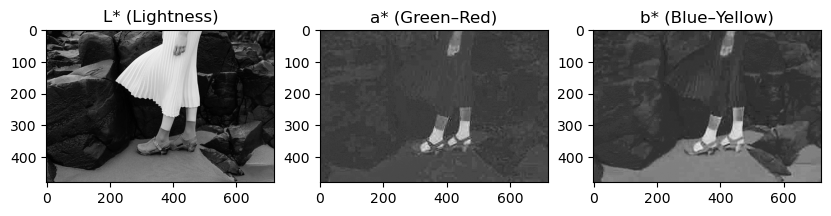

In [54]:
L, a, b = cv.split(im_lab)

# Show channels
plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(L, cmap='gray'); plt.title("L* (Lightness)")
plt.subplot(1,3,2); plt.imshow(a, cmap='gray'); plt.title("a* (Green–Red)")
plt.subplot(1,3,3); plt.imshow(b, cmap='gray'); plt.title("b* (Blue–Yellow)")
plt.show()

In [59]:
#gamma correction
L_f = L * (100/255)
gamma = 0.7
L_g = ((L_f/100) ** gamma) *100

L_corrected = np.clip(np.round(L_g * (255/100)),0,255).astype(np.uint8)

lab_corrected = cv.merge([L_corrected,a,b])
im_corrected = cv.cvtColor(lab_corrected,cv.COLOR_LAB2RGB)


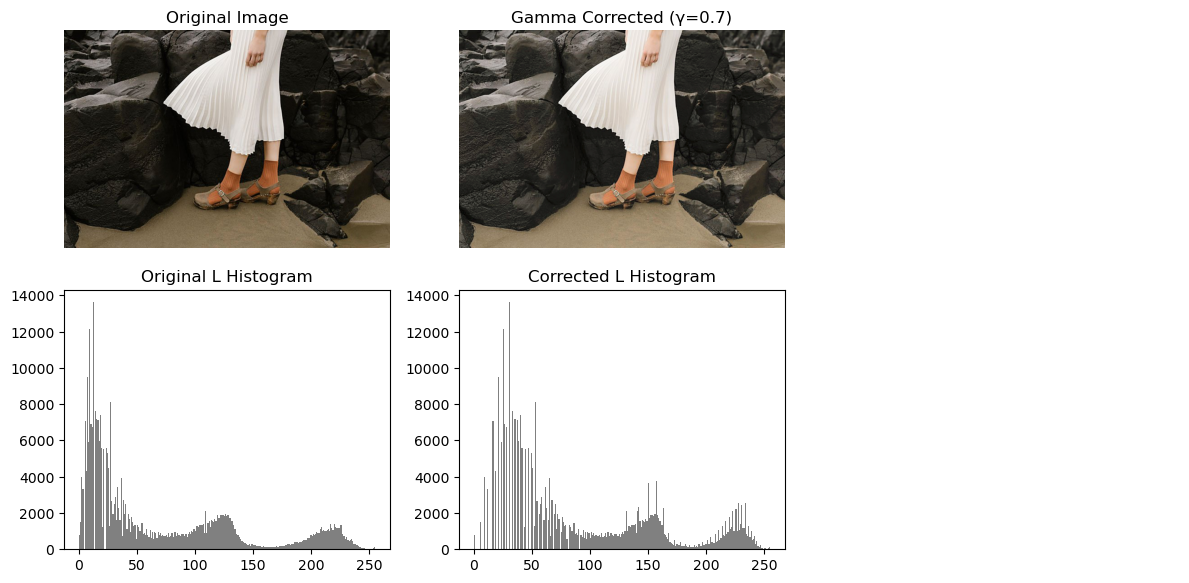

In [60]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Original Image
axes[0, 0].imshow(im_rgb)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Corrected Image
axes[0, 1].imshow(im_corrected)
axes[0, 1].set_title(f"Gamma Corrected (γ={gamma})")
axes[0, 1].axis("off")

# L channel histogram (original)
axes[1, 0].hist(L.flatten(), bins=256, color='gray')
axes[1, 0].set_title("Original L Histogram")

# L channel histogram (corrected)
axes[1, 1].hist(L_corrected.flatten(), bins=256, color='gray')
axes[1, 1].set_title("Corrected L Histogram")

# Hide empty plot
axes[0, 2].axis("off")
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()

In [57]:
L

array([[  7,   7,  12, ...,  18,  23,  26],
       [  7,   6,   8, ...,  20,  26,  27],
       [  7,   3,   3, ...,  23,  27,  29],
       ...,
       [ 36,  44,  50, ..., 120, 135, 146],
       [ 50,  63,  70, ..., 129, 148, 152],
       [ 75,  84,  80, ..., 141, 150, 136]], shape=(480, 720), dtype=uint8)

In [58]:
L_corrected

array([[ 42,  42,  55, ...,  68,  77,  81],
       [ 42,  39,  45, ...,  71,  81,  83],
       [ 42,  28,  28, ...,  77,  83,  86],
       ...,
       [ 96, 106, 113, ..., 175, 186, 193],
       [113, 127, 134, ..., 181, 194, 197],
       [138, 146, 143, ..., 190, 196, 186]], shape=(480, 720), dtype=uint8)

## Question 4

In [72]:
im = cv.imread("a1images/spider.png")
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)
im_hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)

In [73]:
print(im[0])
print("***")
print(im_hsv[0])

[[205 197 182]
 [203 195 182]
 [204 196 182]
 ...
 [122 117 107]
 [120 114 103]
 [118 111  99]]
***
[[100  29 205]
 [101  26 203]
 [101  28 204]
 ...
 [100  31 122]
 [101  36 120]
 [101  41 118]]


In [74]:
H,S,V = cv.split(im_hsv)
S

array([[29, 26, 28, ..., 31, 36, 41],
       [33, 33, 33, ..., 31, 27, 32],
       [33, 33, 33, ..., 40, 35, 28],
       ...,
       [18, 15, 29, ..., 51, 51, 55],
       [34, 35, 24, ..., 54, 55, 54],
       [40, 21, 42, ..., 56, 56, 56]], shape=(438, 780), dtype=uint8)

In [75]:
a = 0.7
sigma = 70

S_cal = S + a * 128 * np.exp(-((S - 128) ** 2) / (2 * sigma ** 2))
S_en = np.clip(np.round(S_cal),0,255).astype(np.uint8)

S_en

array([[120, 116, 120, ..., 121, 128, 132],
       [124, 124, 124, ..., 121, 117, 122],
       [124, 124, 124, ..., 131, 125, 120],
       ...,
       [109, 105, 120, ..., 143, 143, 145],
       [125, 125, 115, ..., 145, 145, 145],
       [131, 111, 132, ..., 147, 147, 147]], shape=(438, 780), dtype=uint8)

In [76]:
hsv_en = cv.merge([H,S_en,V])
im_en = cv.cvtColor(hsv_en,cv.COLOR_HSV2RGB)


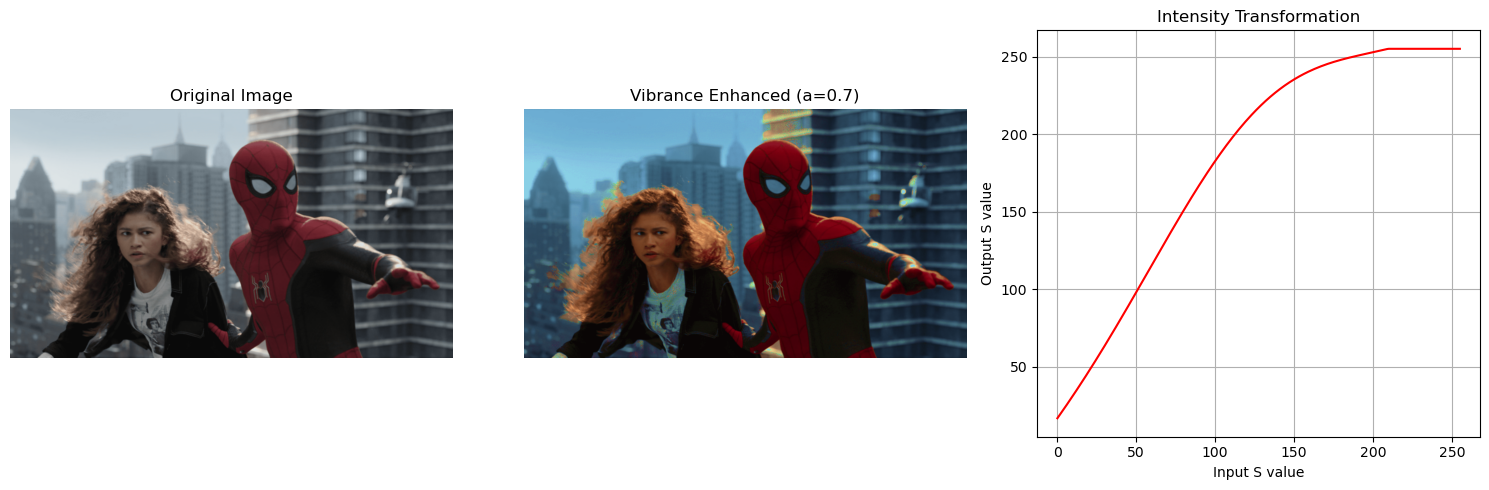

In [78]:
x_vals = np.arange(0, 256)
y_vals = np.clip(x_vals + a * 128 * np.exp(-((x_vals - 128) ** 2) / (2 * sigma ** 2)), 0, 255)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(im_en)
ax[1].set_title(f"Vibrance Enhanced (a={a})")
ax[1].axis("off")

ax[2].plot(x_vals, y_vals, color='red')
ax[2].set_title("Intensity Transformation")
ax[2].set_xlabel("Input S value")
ax[2].set_ylabel("Output S value")
ax[2].grid(True)

plt.tight_layout()
plt.show()